- k4:
  - score: 0.7648026315789473
    macro: 0.5481621219916538
- k123: 
  - score: 0.6266447368421053
    macro: 0.4746950349211182
- k1234
  - score: 0.6134868421052632
    macro: 0.4666726389775404

- msvm, s10
  - k123
    - acc: 0.45394736842105265
    - macro: 0.3608915906788247
  - k4
      acc: 0.25
      macro: 0.24211907495489587
  - k1234
      acc: 0.48026315789473684
      macro: 0.37037765281109497

- k1234
  - svm: macro: 0.3060999606454152
  - msvm: macro: 0.37007722240292984
  - cv_msvm: avg macro: 0.3250754726641228
- k123
  - svm: macro: 0.3060999606454152
  - msvm: macro: 0.38140635297619224
  - cv_msvm: avg macro: 0.3761675354364903
- k4
  - svm: macro: 0.3755101918590897
  - msvm: macro: 0.32977367460126084
  - cv_msvm: avg macro: 0.324905282549163

- sklearn.datasets.make_classification
  - svm: AUROC: 0.6891547139860537
  - msvs: AUROC: 0.8446057032711606
  - cv_msvm: avg AUROC: 0.8968515684849484

- Pes in One 2
  - DAC
    - svm: 0.17072959515046549
    - msvm: 0.1562477175156832
    - cv_msvm: 0.16478740971404165
  - DCC
    - svm: 0.12033986474770245
    - msvm: 0.27881428270533326
    - cv_msvm: 0.2415362742224046
  - MAC
    - svm: 0.28923493416563184
    - msvm: 0.2785699002120251
    - cv_msvm: 0.30628828824115173
  - mismatch
    - k2m1
      - svm: 0.47766323024054985
      - msvm: 0.08261158501378131
      - cv_msvm: 0.07860998058453314
    - k3m1
      - svm: 0.47766323024054985
      - msvm: 0.08261158501378131
      - cv_msvm: 0.07715152523316196
    - k4m1
      - svm: 0.47766323024054985
      - msvm: 0.08641114982578398
      - cv_msvm: 0.08011518787184438
  - NMBAC
    - svm: 0.4184028317361651
    - msvm: 0.4099553854241081
    - cv_msvm: 0.3401814748171884
  - PCPseDNC
    - svm: 0.29222394372094973
    - msvm: 0.3715384615384615
    - cv_msvm: 0.39446571684674814
  - SCPseDNC
    - svm: 0.5375622578859989
    - msvm: 0.5515356945213061
    - cv_msvm: 0.35850501610538504

In [1]:
import time
import hashlib

import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn import svm, metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from libsvm.svmutil import svm_problem
from libsvm.svmutil import svm_parameter
from libsvm.svmutil import svm_train
from libsvm.svmutil import svm_predict
from libsvm.svmutil import evaluations


In [103]:
data_x = np.genfromtxt('data/Pes_in_One2/cdhit80_data_seq_loc75_aucg_PCPseDNC.csv', delimiter=',')

In [104]:
# data_x = np.load("data/k_mers/k4_datax.npy")
# data_x = np.load("data/linear_features/point/k1p8nor3n10.npy")
# data_x = data_x.reshape(data_x.shape[0],-1)
data_y = np.load("data/linear_features/data_y.npy")
data_len = np.load("data/linear_features/data_len.npy")
print(data_x.shape)
print(data_y.shape)
print(data_len.shape)

(3040, 28)
(3040,)
(3040,)


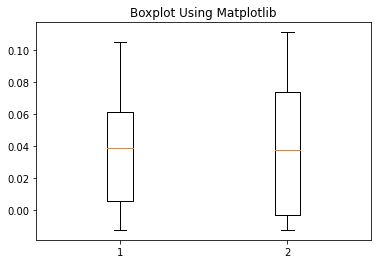

In [28]:
plt.boxplot([data_x[data_y == 1][1], data_x[data_y == 0][1]])
# plt.boxplot([data_len[data_y == 1], data_len[data_y == 0]])
plt.title("Boxplot Using Matplotlib")
plt.show()

In [19]:
from os import listdir
from os.path import isfile, join

dir_path = "data/Pes_in_One2/"
onlyfiles = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]
print(onlyfiles)

data_y = np.load("data/linear_features/data_y.npy")

log_array = []
for file_name in onlyfiles:
    if file_name.split(".")[-1] == "csv":
        data_x = np.genfromtxt(dir_path + file_name, delimiter=',')
        # data_x = np.load(dir_path + file_name)
        # data_x = data_x.reshape(data_x.shape[0],-1)

        if data_x.shape[1] < 400:
            x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
            # print("SVM")
            # ros = RandomOverSampler(random_state=42)
            # X_res, y_res = ros.fit_resample(x_train, y_train)
            # prob = svm_problem(y_res, X_res)
            # param = svm_parameter('')
            # m = svm_train(prob, param)
            # p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
            # svm_auroc = metrics.roc_auc_score(y_test, p_label)
            # print("AUROC:", svm_auroc)

            print("mSVM")
            msvm = multi_SVM(class_weight='balanced')
            msvm.train(x_train, y_train, size=15, parameter="")
            msvm_auroc = msvm.test(x_test, y_test)
            
            # print("cv mSVM")
            # score_array = cv_msvm_score(data_x, data_y, 10, size=15, parameter="")
            # cv_msvm_auroc = sum(score_array) / len(score_array)
            
            log_array.append([file_name, data_x.shape[1], svm_auroc, msvm_auroc, cv_msvm_auroc])

['k1p10nor1.npy.dvc', 'k1p10nor3.npy.dvc', 'k2p4nor0.npy.dvc', 'k2p4nor1.npy.dvc', 'k2p4nor2.npy.dvc', 'k2p4nor3.npy.dvc', 'k2p6nor0.npy.dvc', 'k2p6nor1.npy', 'k2p6nor2.npy', 'k2p8nor0.npy.dvc', 'k2p8nor2.npy', 'k1p10nor2.npy', 'k2p6nor0.npy', 'k2p6nor1.npy.dvc', 'k2p6nor2.npy.dvc', 'k2p6nor3.npy.dvc', 'k2p8nor3.npy', 'k2p8nor0.npy', 'k2p8nor1.npy.dvc', 'k2p8nor2.npy.dvc', 'k2p8nor3.npy.dvc', 'k2p10nor0.npy.dvc', 'k3p8nor1.npy', 'k3p8nor2.npy', 'k2p10nor2.npy', 'k3p6nor0.npy', 'k3p6nor1.npy', 'k3p6nor2.npy.dvc', 'k3p6nor3.npy.dvc', 'k3p10nor0.npy', 'k3p8nor0.npy', 'k3p8nor1.npy.dvc', 'k3p8nor2.npy.dvc', 'k3p8nor3.npy.dvc', 'k3p10nor0.npy.dvc', 'k3p10nor2.npy.dvc', 'k3p10nor1.npy', 'k3p10nor2.npy', 'k4p4nor0.npy.dvc', 'k4p4nor1.npy.dvc', 'k4p4nor3.npy.dvc', 'k4p6nor0.npy.dvc', 'k4p6nor1.npy.dvc', 'k4p6nor3.npy.dvc', 'k4p8nor0.npy.dvc', 'k4p8nor1.npy.dvc', 'k4p8nor3.npy.dvc', 'k4p10nor0.npy.dvc', 'k4p10nor1.npy.dvc', 'k4p10nor2.npy.dvc', 'k4p10nor2.npy', 'k4p10nor3.npy', '.gitignore', 'k

In [20]:
df = pd.DataFrame(log_array, columns=["file name", "Features", "svm", "msvm", "cv msvm"])
df

,file name,Features,svm,msvm,cv msvm
0,k2p6nor1.npy,112,0.508924,0.467764,0.49153


In [105]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
print("SVM")
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(x_train, y_train)
prob = svm_problem(y_res, X_res)
param = svm_parameter('')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print("AUROC:", metrics.roc_auc_score(y_test, p_label))

print("mSVM")
msvm = multi_SVM(class_weight='balanced')
msvm.train(x_train, y_train, size=15, parameter="")
msvm.test(x_test, y_test)

SVM
Accuracy = 29.7697% (181/608) (classification)
AUROC: 0.5375622578859989
mSVM
Accuracy = 50.1645% (305/608) (classification)
Accuracy = 49.3421% (300/608) (classification)
Accuracy = 44.2434% (269/608) (classification)
Accuracy = 65.1316% (396/608) (classification)
Accuracy = 62.8289% (382/608) (classification)
Accuracy = 23.8487% (145/608) (classification)
Accuracy = 28.9474% (176/608) (classification)
Accuracy = 31.25% (190/608) (classification)
Accuracy = 21.7105% (132/608) (classification)
Accuracy = 56.5789% (344/608) (classification)
Accuracy = 41.4474% (252/608) (classification)
Accuracy = 31.7434% (193/608) (classification)
Accuracy = 58.7171% (357/608) (classification)
Accuracy = 28.9474% (176/608) (classification)
Accuracy = 34.8684% (212/608) (classification)
Accuracy = 49.6711% (302/608) (classification)
Accuracy = 53.125% (323/608) (classification)
Accuracy = 35.3618% (215/608) (classification)
Accuracy = 33.5526% (204/608) (classification)
Accuracy = 33.8816% (206/608

0.5515356945213061

In [ ]:
pred_y = msvm.predict(x_test)
pred_y = np.array(pred_y)
print("macro:", f1_score(pred_y, y_test, average='macro'))
pred_y = np.where(pred_y == 0, 1, 0)
print("macro:", f1_score(pred_y, y_test, average='macro'))

In [92]:
def data_split(x, y, test_size=0.2, shuffle=False, random_state=None):
    unique, _ = np.unique(data_y, return_counts=True)
    train_x = None
    train_y = None
    test_x = None
    test_y = None
    for u in unique:
        u_x = data_x[data_y == u]
        u_y = data_y[data_y == u]
        
        if random_state:
            np.random.seed(random_state)
        
        if shuffle:
            arr = np.arange(len(u_x))
            np.random.shuffle(arr)
            u_x = u_x[arr]
            u_y = u_y[arr]
        
        split_id = int((1 - test_size) * len(u_y))
        if train_x is None:
            train_x = np.array(u_x[:split_id])
            train_y = np.array(u_y[:split_id])
            test_x = np.array(u_x[split_id:])
            test_y = np.array(u_y[split_id:])
        else:
            train_x = np.append(train_x, u_x[:split_id], axis=0)
            train_y = np.append(train_y, u_y[:split_id], axis=0)
            test_x = np.append(test_x, u_x[split_id:], axis=0)
            test_y = np.append(test_y, u_y[split_id:], axis=0)
    return train_x, test_x, train_y, test_y

In [106]:
score_array = cv_msvm_score(data_x, data_y, 10, size=15, parameter="")
print(sum(score_array) / len(score_array))

Accuracy = 45.8746% (139/303) (classification)
Accuracy = 47.5248% (144/303) (classification)
Accuracy = 67.9868% (206/303) (classification)
Accuracy = 53.4653% (162/303) (classification)
Accuracy = 53.7954% (163/303) (classification)
Accuracy = 24.7525% (75/303) (classification)
Accuracy = 59.736% (181/303) (classification)
Accuracy = 48.8449% (148/303) (classification)
Accuracy = 42.5743% (129/303) (classification)
Accuracy = 44.2244% (134/303) (classification)
Accuracy = 42.9043% (130/303) (classification)
Accuracy = 44.5545% (135/303) (classification)
Accuracy = 39.2739% (119/303) (classification)
Accuracy = 43.5644% (132/303) (classification)
Accuracy = 12.2112% (37/303) (classification)
Accuracy = 73.5974% (223/303) (classification)
Accuracy = 29.0429% (88/303) (classification)
Accuracy = 46.5347% (141/303) (classification)
Accuracy = 44.8845% (136/303) (classification)
Accuracy = 49.1749% (149/303) (classification)
Accuracy = 46.8647% (142/303) (classification)
Accuracy = 39.604

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)

In [16]:
clf = svm.SVC(kernel='rbf', C=1, class_weight='balanced').fit(x_train, y_train)
            
score = clf.score(x_test, y_test)
print("score:", score)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

score: 0.7680921052631579
macro: 0.5465062764826305


In [3]:
import math
class multi_SVM():
    def __init__(self, class_weight='None') -> None:
        self.class_weight = class_weight
        self.model_array = None
    
    def train(self, x, y, size=1, parameter=""):
        if self.class_weight == 'balanced':
            data = None
            label = None
            for i in range(size):
                d, l = self.balanced_data(x, y)
                if data is None:
                    data = d
                    label = l
                else:
                    data = np.append(data, d, axis=0)
                    label = np.append(label, l, axis=0)
        
        model_array = []
        for d, l in zip(data, label):
            arr = np.arange(len(l))
            np.random.shuffle(arr)
            d = d[arr]
            l = l[arr]

            prob = svm_problem(l, d)
            param = svm_parameter(parameter)
            m = svm_train(prob, param)
            # p_label, p_acc, p_val = svm_predict(l, d, m)
            # (score, MSE, SCC) = evaluations(l, p_label)
            model_array.append(m)
            # break
        
        self.model_array = model_array
        
        return None
    
    def test(self, x, y):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict(y, x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        # print("acc:", sum(np.where(pred_y == y, 1, 0)) / len(y))
        # print("macro:", f1_score(pred_y, y, average='macro'))
        return metrics.roc_auc_score(y, pred_y)
    
    def predict(self, x):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict([], x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return pred_y
    
    def balanced_data(self, x, y):
        unique, count = np.unique(y, return_counts=True)
        min_count = min(count)
        big_batch = math.ceil(max(count) / min_count)
        min_u = np.where(count == min_count, unique, -1)
        
        data = None
        label = None
        for u in unique:
            u_data = None
            if not u in min_u:
                while u_data is None or len(u_data) != big_batch * min_count:
                    x_u = x[y == u]
                    np.random.shuffle(x_u)
                    mod = len(x_u) % min_count
                    if mod != 0:
                        arr = np.arange(len(x_u) - mod)
                        np.random.shuffle(arr)
                        x_u = np.append(x_u, x_u[arr[mod - min_count:]], axis=0)
                    if u_data is None:
                        u_data = x_u
                    else:
                        u_data = np.append(u_data, x_u[:(big_batch * min_count) - len(u_data)], axis=0)
                u_data = np.array(np.split(u_data, big_batch))
            else:
                x_u = x[y == u]
                x_u = np.expand_dims(x_u, axis=0)
                u_data = np.repeat(x_u, big_batch, axis=0)

            if data is None:
                data = u_data
                label = np.full((big_batch, min_count), u)
            else:
                data = np.append(data, u_data, axis=1)  
                label = np.append(label, np.full((big_batch, min_count), u), axis=1)

        return data, label

# msvm = multi_SVM(class_weight='balanced')

# x = np.linspace((1,2),(10,20),10)
# y = np.array([0, 0, 1, 1, 1, 2, 2, 2, 2, 2])
# msvm.train(x, y, size=1)
# msvm.train(x_train, y_train, size=15)
# msvm.test(x_test, y_test)

In [4]:
def CV(x, y, folder):
    unique, count = np.unique(y, return_counts=True)
    cv_x = []
    cv_y = []
    for u in unique:
        u_x = x[y == u]
        u_y = y[y == u]
        arr = np.arange(len(u_x))
        np.random.shuffle(arr)
        u_x = u_x[arr]
        u_y = u_y[arr]
        
        linspace = np.linspace(0, len(u_x), folder + 1, dtype=int)
        
        for i in range(folder):
            if unique[0] == u:
                cv_x.append(u_x[linspace[i]:linspace[i+1]])
                cv_y.append(u_y[linspace[i]:linspace[i+1]])
            else:
                cv_x[i] = np.append(cv_x[i], u_x[linspace[i]:linspace[i+1]], axis=0)
                cv_y[i] = np.append(cv_y[i], u_y[linspace[i]:linspace[i+1]], axis=0)
    return cv_x, cv_y

def cv_msvm_score(x, y, folder, size=15, parameter=""):
    cv_x, cv_y = CV(x, y, folder)
    score_array = []
    for j in range(len(cv_x)):
        train_x = None
        for i in range(len(cv_x)):
            if i == j :
                test_x = cv_x[i]
                test_y = cv_y[i]
            else:
                if train_x is None:
                    train_x = cv_x[i]
                    train_y = cv_y[i]
                else:
                    train_x = np.append(train_x, cv_x[i], axis=0)
                    train_y = np.append(train_y, cv_y[i], axis=0)
        msvm = multi_SVM(class_weight='balanced')
        msvm.train(train_x, train_y, size=size, parameter=parameter)
        score_array.append(msvm.test(test_x, test_y))
    return score_array

# print(cv_msvm_score(data_x, data_y, 10, size=15, parameter=""))

# x = np.linspace((1,2),(10,20),10)
# y = np.array([0, 0, 1, 1, 1, 2, 2, 2, 2, 2])
# print(x)
# print(y)
# cv_x, cv_y = CV(x, y, 2)
# print(cv_x)
# print(cv_y)
# cv_x, cv_y = CV(data_x, data_y, 10)

In [16]:
from sklearn.datasets import make_classification
# generate 2 class dataset
x, y = make_classification(n_samples=3000, n_classes=2, weights=[0.05, 0.95], random_state=0)
# summarize dataset
print("x", x.shape)
classes = np.unique(y)
total = len(y)
for c in classes:
	n_examples = len(y[y==c])
	percent = n_examples / total * 100
	print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=12)

print("SVM")
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(x_train, y_train)
prob = svm_problem(y_res, X_res)
param = svm_parameter('')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print("AUROC:", metrics.roc_auc_score(y_test, p_label))

print("mSVM")
msvm = multi_SVM(class_weight='balanced')
msvm.train(x_train, y_train, size=15)
msvm.test(x_test, y_test)

# print("cv_msvm")
# cv_x, cv_y = CV(x, y, 10)

x (3000, 20)
> Class=0 : 171/3000 (5.7%)
> Class=1 : 2829/3000 (94.3%)
SVM
Accuracy = 96% (576/600) (classification)
AUROC: 0.6891547139860537
mSVM
Accuracy = 92.6667% (556/600) (classification)
Accuracy = 93% (558/600) (classification)
Accuracy = 91.1667% (547/600) (classification)
Accuracy = 91.8333% (551/600) (classification)
Accuracy = 93.1667% (559/600) (classification)
Accuracy = 93% (558/600) (classification)
Accuracy = 91.5% (549/600) (classification)
Accuracy = 94.3333% (566/600) (classification)
Accuracy = 92.6667% (556/600) (classification)
Accuracy = 92.3333% (554/600) (classification)
Accuracy = 92.3333% (554/600) (classification)
Accuracy = 92.6667% (556/600) (classification)
Accuracy = 91.8333% (551/600) (classification)
Accuracy = 92.3333% (554/600) (classification)
Accuracy = 92.8333% (557/600) (classification)
Accuracy = 93.8333% (563/600) (classification)
Accuracy = 93.3333% (560/600) (classification)
Accuracy = 91.3333% (548/600) (classification)
Accuracy = 94% (564

0.8446057032711606

In [17]:
score_array = cv_msvm_score(x, y, 10, size=15, parameter="")
print(sum(score_array) / len(score_array))

Accuracy = 92.3077% (276/299) (classification)
Accuracy = 91.6388% (274/299) (classification)
Accuracy = 90.6355% (271/299) (classification)
Accuracy = 93.6455% (280/299) (classification)
Accuracy = 91.3043% (273/299) (classification)
Accuracy = 88.9632% (266/299) (classification)
Accuracy = 89.9666% (269/299) (classification)
Accuracy = 91.9732% (275/299) (classification)
Accuracy = 89.9666% (269/299) (classification)
Accuracy = 90.6355% (271/299) (classification)
Accuracy = 92.3077% (276/299) (classification)
Accuracy = 91.6388% (274/299) (classification)
Accuracy = 91.6388% (274/299) (classification)
Accuracy = 88.9632% (266/299) (classification)
Accuracy = 89.6321% (268/299) (classification)
Accuracy = 90.301% (270/299) (classification)
Accuracy = 91.3043% (273/299) (classification)
Accuracy = 90.301% (270/299) (classification)
Accuracy = 90.9699% (272/299) (classification)
Accuracy = 89.9666% (269/299) (classification)
Accuracy = 92.6421% (277/299) (classification)
Accuracy = 90.3

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
print("SVC")
clf = svm.SVC(kernel='rbf', C=1, class_weight='balanced')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

print("SVM")
prob = svm_problem(y_train, x_train)
param = svm_parameter('')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print("AUROC:", metrics.roc_auc_score(y_test, p_label))

print("mSVM")
msvm = multi_SVM(class_weight='balanced')
msvm.train(x_train, y_train, size=15)
msvm.test(x_test, y_test)

SVC
macro: 0.4666726389775404
SVM
Accuracy = 91.4474% (556/608) (classification)
AUROC: 0.5
mSVM


KeyboardInterrupt: 

In [11]:
print(np.unique(y_train, return_counts=True))

print("SVM")
prob = svm_problem(y_train, x_train)
param = svm_parameter('-w0 177 -w1 2255')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print("macro:", f1_score(p_label, y_test, average='macro'))

(array([0, 1]), array([ 177, 2255]))
SVM
Accuracy = 91.4474% (556/608) (classification)
macro: 0.47766323024054985


In [12]:
cv_x, cv_y = CV(data_x, data_y, 10)
score_array = []
for i in range(len(cv_x)):
    train_x = None
    for j in range(len(cv_x)):
        if i == j :
            test_x = cv_x[i]
            test_y = cv_y[i]
        else:
            if train_x is None:
                train_x = cv_x[i]
                train_y = cv_y[i]
            else:
                train_x = np.append(train_x, cv_x[i], axis=0)
                train_y = np.append(train_y, cv_y[i], axis=0)
    print(train_x.shape)
    print(test_x.shape)
    msvm = multi_SVM(class_weight='balanced')

    msvm.train(train_x, train_y, size=15)
    score_array.append(msvm.test(test_x, test_y))

print("avg macro:", sum(score_array) / len(score_array))

(2727, 12)
(303, 12)
Accuracy = 11.5512% (35/303) (classification)
Accuracy = 15.8416% (48/303) (classification)
Accuracy = 12.8713% (39/303) (classification)
Accuracy = 12.8713% (39/303) (classification)
Accuracy = 12.5413% (38/303) (classification)
Accuracy = 26.0726% (79/303) (classification)
Accuracy = 12.2112% (37/303) (classification)
Accuracy = 11.5512% (35/303) (classification)
Accuracy = 14.1914% (43/303) (classification)
Accuracy = 12.8713% (39/303) (classification)
Accuracy = 12.5413% (38/303) (classification)
Accuracy = 23.4323% (71/303) (classification)
Accuracy = 12.8713% (39/303) (classification)
Accuracy = 11.8812% (36/303) (classification)
Accuracy = 14.1914% (43/303) (classification)
Accuracy = 12.8713% (39/303) (classification)
Accuracy = 12.5413% (38/303) (classification)
Accuracy = 14.1914% (43/303) (classification)
Accuracy = 12.2112% (37/303) (classification)
Accuracy = 27.3927% (83/303) (classification)
Accuracy = 13.5314% (41/303) (classification)
Accuracy = 26

In [14]:
from scipy import stats

row_count = np.array(row_count)
print(row_count)
z = stats.zscore(row_count, axis=1, ddof=1)
print(row_count.shape)
print(z.shape)

[[7484 5884 4306 ... 6343 5368 5271]
 [2970 2204 1449 ... 2501 3457 2516]
 [2302 2323 1042 ... 1991  876  941]
 ...
 [   3    2    1 ...    5   10    4]
 [   7    2    4 ...    4    2    3]
 [   4    3    9 ...    4    0    1]]
(3998, 16)
(3998, 16)


In [11]:
df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_test.csv")

In [16]:
from collections import Counter
def build_vocab(data):
    word_counts = Counter(row.lower() for sample in data for row in sample)
    vocab = [w for w, f in iter(word_counts.items())]
    return vocab
    
def k_mers(data, n):
    kmer_array = [[s[i:i + n].lower() for i in range(len(s) - n)] for s in data]
    vocab = build_vocab(kmer_array)
    return kmer_array, vocab

data_y = np.where(df["loc"].to_numpy() == "Cytosolic", 1, 0)

data_x = None
for k in range(4, 5):
    kmer_array, vocab = k_mers(df["Sequence"], k)
    
    k_array = None
    for x in kmer_array:
        has_v, counts = np.unique(x, return_counts=True)
        
        count_array = []
        for v in vocab:
            if v in has_v:
                count_array.append(counts[list(has_v).index(v)] / sum(counts))
            else:
                count_array.append(0)
        if k_array is None:
            k_array = np.array([count_array])
        else:
            k_array = np.append(k_array, [count_array], axis=0)
        # counter_array = []
        # for v, n in zip(x_counter.keys(), x_counter.values()):
            
        #     print(v)
        #     print(n)
    # print(k_array)
    if data_x is None:
        data_x = k_array
    else:
        data_x = np.append(data_x, k_array, axis=1)
    print(data_x.shape)

(608, 256)


In [17]:
np.save("data/k_mers/test/k4_datax", data_x)
# np.save("data/k_mers/k4_datay", data_y)